# Self Driving Car using (End to End CNN/Dave-2)
![alt img](https://cdn-images-1.medium.com/max/868/0*7dReqQXElneHBWUr.jpg)
* Used convolutional neural networks (CNNs) to map the raw pixels from a front-facing camera to the steering commands for a self-driving car. This powerful end-to-end approach means that with minimum training data from humans, the system learns to steer, with or without lane markings, on both local roads and highways. The system can also operate in areas with unclear visual guidance such as parking lots or unpaved roads.
* The system is trained to automatically learn the internal representations of necessary processing steps, such as detecting useful road features, with only the human steering angle as the training signal. We do not need to explicitly trained it to detect, for example, the outline of roads.
* End-to-end learning leads to better performance and smaller systems. Better performance results because the internal components self-optimize to maximize overall system performance, instead of optimizing human-selected intermediate criteria, e. g., lane detection. Such criteria understandably are selected for ease of human interpretation which doesn’t automatically guarantee maximum system performance. Smaller networks are possible because the system learns to solve the problem with the minimal number of processing steps.
* It is also called as DAVE-2 System by Nvidia

Watch Real Car Running Autonoumously using this Algorithm
https://www.youtube.com/watch?v=NJU9ULQUwng

### Credits & Inspired By
(1) https://github.com/SullyChen/Autopilot-TensorFlow<br>
(2) Research paper: End to End Learning for Self-Driving Cars by Nvidia. [https://arxiv.org/pdf/1604.07316.pdf]<br>
(3) Nvidia blog: https://devblogs.nvidia.com/deep-learning-self-driving-cars/ <br>
(4) https://devblogs.nvidia.com/explaining-deep-learning-self-driving-car/

### Conclusions from the paper
* This demonstrated that CNNs are able to learn the entire task of lane and road following without manual decomposition into road or lane marking detection, semantic abstraction, path planning, and control.The system learns for example to detect the outline of a road without the need of explicit labels during training. 
* A small amount of training data from less than a hundred hours of driving was sufficient to train the car to operate in diverse conditions, on highways, local and residential roads in sunny, cloudy, and rainy conditions. 
* The CNN is able to learn meaningful road features from a very sparse training signal (steering alone).
* More work is needed to improve the robustness of the network, to find methods to verify the robust- ness, and to improve visualization of the network-internal processing steps.

### Other Larger Datasets you can train on
(1) Udacity: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5<br>
70 minutes of data ~ 223GB<br>
Format: Image, latitude, longitude, gear, brake, throttle, steering angles and speed<br>
(2) Udacity Dataset: https://github.com/udacity/self-driving-car/tree/master/datasets [Datsets ranging from 40 to 183 GB in different conditions]<br>
(3) Comma.ai Dataset [80 GB Uncompressed] https://github.com/commaai/research<br>
(4) Apollo Dataset with different environment data of road: http://data.apollo.auto/?locale=en-us&lang=en<br>
### Some other State of the Art Implementations
Implementations: https://github.com/udacity/self-driving-car<br>
Blog: https://medium.com/udacity/teaching-a-machine-to-steer-a-car-d73217f2492c<br><br>

In [3]:
# Imports
import numpy
import matplotlib.pyplot as plt
from __future__ import division
import os
import random

from scipy import pi
from itertools import islice


In [5]:
# read images and steering angles from driving_dataset folder

DATA_FOLDER = './driving_dataset/' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.8 #Train = 80%
X = []
y = []
with open(TRAIN_FILE) as fp:
    for line in fp:
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )


y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.8)

train_y = y[:split_index]
test_y = y[split_index:]

          

Completed processing data.txt


### PDF of steering angle in radians in train and test 

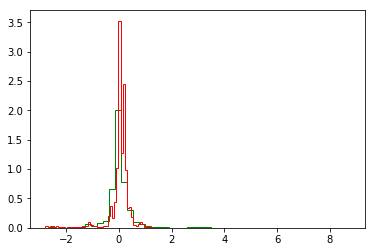

In [9]:
 
plt.hist(train_y, bins=50, density=True, color='green', histtype ='step');
plt.hist(test_y, bins=50, density=True, color='red', histtype ='step');
plt.show()

### Model 0: Baseline Model [Predicted Value = Mean Value]

In [10]:
#y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

# Predicted value as mean value
print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

#Predicted value as zero
print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )

Test_MSE(MEAN):0.191127
Test_MSE(ZERO):0.190891


##### We are getting quite okay Mean Squared Error(MSE) with even dumb model of predicted value as mean value or 0